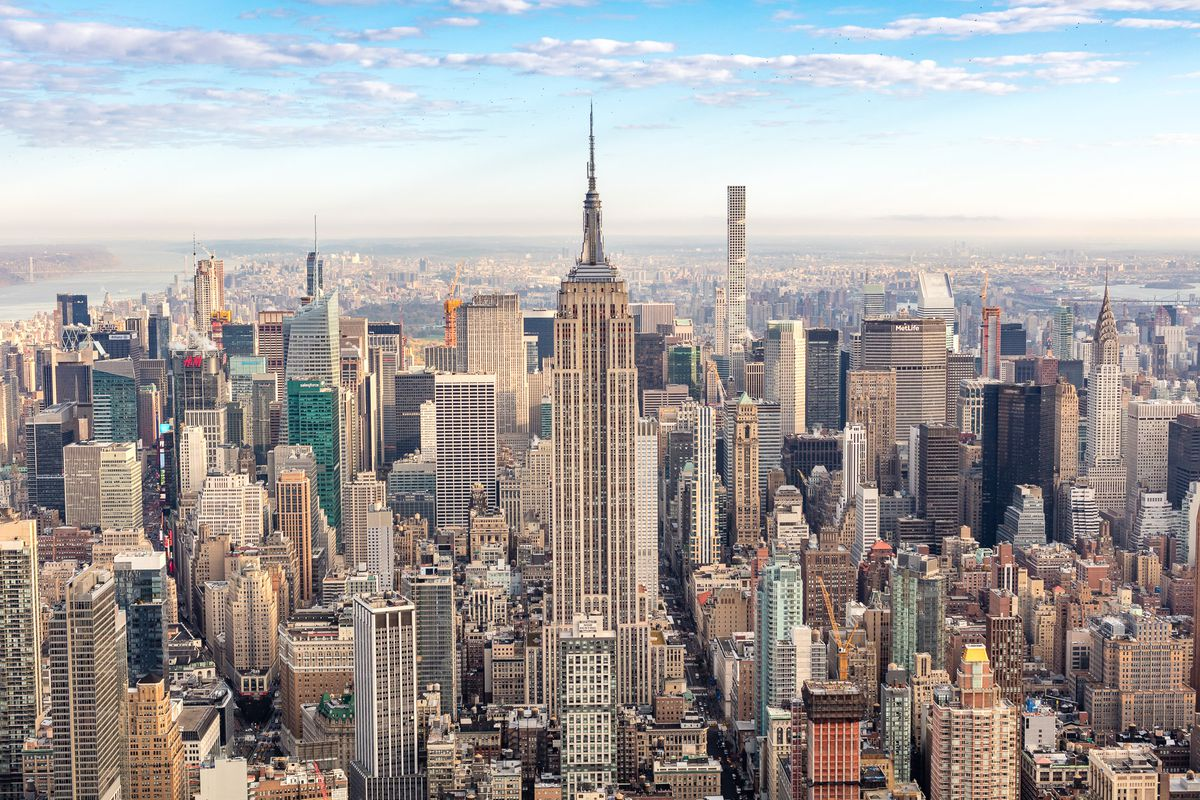

# An Analysis of Airbnb Data from New York City

#### Megha Guggari, Rohit Mandavia, Ngan Nguyen

### Introduction 

Airbnb is a popular tool that has made travel easy with simple/straight-forward room bookings all over the world (fun fact there are over 6 million Airbnb listings worldwide!) Our group chose to analyze Airbnb data from NYC after we realized that we were all travelling to NYC after our exams! Travelling to NYC is common, and we thought it would be useful to visualize things such as prices, ratings, and availabilities per neighborhood. 

The data set we used can be found here: 
[NYC Open Airbnb Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In this tutorial, you will be able to see visualizations such as how price relates to neighborhood, how availabilities relate to areas in the city, and how ratings relate to price/neighborhoods, to name a few. 


Outline of project:
1. Data Collection 
2. Data Preprocessing 
3. Data Visualization 
4. Classification/Prediction 
5. Conclusion 

#### Required Libraries/Tools

For this project, we used the following packages:
1. [Matplotlib](https://matplotlib.org/)
2. [Pandas](https://pandas.pydata.org/)
3. [Folium](https://python-visualization.github.io/folium/)
4. [Numpy](https://numpy.org/)
5. [Sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
6. [Math](https://docs.python.org/3/library/math.html)
7. [Seaborn](https://seaborn.pydata.org/)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install folium
import pandas
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
from sklearn import linear_model
import math
import seaborn as sns

### Part 1 - Data Collection

For our data collection, we chose a dataset from Kaggle that contained open data from NYC Airbnb. 

In [3]:
data = pandas.read_csv("AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### Part 2 - Preprocessing

We chose to exclude some columns that were not very informative. The columns we chose to drop were as follows:

1. id
2. name
3. host_id
4. last_review
5. calculated_host_listings_count

As our second preprocessing step, we chose to eliminate rows based on if the prices seemed unreasoable. This included if the prices were listed anywhere between 0-25 (a price that low seemed less common for NYC, especially), or if the prices were listed to be above 250 per night (as college students we wanted to keep prices that were more common). 

In [4]:
data = data.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count'])

data = data[data['price'] >= 25]
data = data[data['price'] <= 250]

data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,188


### Part 3 - Visualization

The different things we chose to visualize are as follows:

1. Room Type vs Price 
2. Room Type vs Availability
3. Map based on Rating vs Area
4. Map based on Price vs Area
5. Map based on Availability vs Area 

Text(0.5, 0, 'Rental Type')

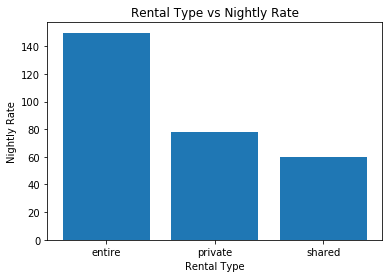

In [5]:
#1 Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row, sortBy):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row[sortBy]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row[sortBy]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row[sortBy]
        tally["shared"]+=1

# data_by_roomtype.apply(generate_bar_plot, axis=1)
for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "price") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")
plt.ylabel("Nightly Rate")
plt.xlabel("Rental Type")

In [6]:
averages

{'entire': 149.78699855002418,
 'private': 77.68099651312167,
 'shared': 59.690298507462686}

Text(0.5, 0, 'Rental Type')

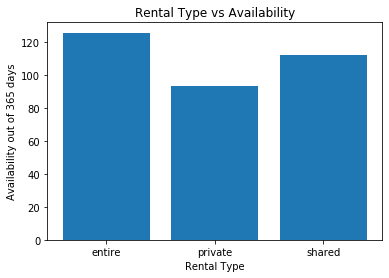

In [7]:
#2 Room_type vs availability

for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "availability_365") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())
plt.title("Rental Type vs Availability")
plt.ylabel("Availability out of 365 days")
plt.xlabel("Rental Type")

# Overall, it is apparent that entire homes/apts are more available in NYC 

In [8]:
averages

{'entire': 125.95045915901402,
 'private': 93.68186823270325,
 'shared': 112.64785447761194}

In [9]:
#3 Map based on rating

# How to group by neighborhood group and then see the data?
m = folium.Map(location=[40.49, -74.24], zoom_start=11)
df = pandas.DataFrame(data)
df = df.sample(n = 1000)

for i in range(0, len(df)):

    if df.iloc[i]['number_of_reviews'] >= 0 and df.iloc[i]['number_of_reviews'] < 100:
        c = 'darkred'
    elif df.iloc[i]['number_of_reviews'] >= 100 and df.iloc[i]['number_of_reviews'] < 200:
        c = 'black'
    elif df.iloc[i]['number_of_reviews'] >= 200 and df.iloc[i]['number_of_reviews'] < 300:
        c = 'orange'
    elif df.iloc[i]['number_of_reviews'] >= 300 and df.iloc[i]['number_of_reviews'] < 400:
        c = 'white'
    elif df.iloc[i]['number_of_reviews'] >= 400 and df.iloc[i]['number_of_reviews'] < 500:
        c = 'green'
    elif df.iloc[i]['number_of_reviews'] >= 500 and df.iloc[i]['number_of_reviews'] < 600:
        c = 'blue'
    elif df.iloc[i]['number_of_reviews'] >= 600 and df.iloc[i]['number_of_reviews'] < 700:
        c = 'purple'
        
    folium.Circle(
        radius=5,
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup= df.iloc[i]['neighbourhood_group'],
        color=c,
        fill=False,
    ).add_to(m)
    
m

# A quick analysis showed that better reviews tend to be farther away from the actual city area. 
# For example, better reviews are more common in Queens. 

In [10]:
#4 Map based on Price vs Area

data_price_sample = data.sample(n=1000)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=14)
heat_data = []
for index, row in data_price_sample.iterrows():
    loc_price = []
    lat = row['latitude']
    long = row['longitude']
    price = row['price']
    loc_price.append(lat)
    loc_price.append(long)
    loc_price.append(price)
    heat_data.append(loc_price)
    
HeatMap(heat_data, max_val=10000).add_to(m)
m

In [11]:
#5 Map based on Available Airbnbs vs Area

data_price_sample = data.sample(n=1000)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=14)
heat_data = []
for index, row in data_price_sample.iterrows():
    loc_availability = []
    lat = row['latitude']
    long = row['longitude']
    availability_365 = row['availability_365']
    loc_availability.append(lat)
    loc_availability.append(long)
    loc_availability.append(-availability_365)
    heat_data.append(loc_availability)
    
HeatMap(heat_data, max_val=0).add_to(m)
m

In [12]:
map_hooray = folium.Map(location=[40.7, -73.9],
                    zoom_start = 10) 

df_acc = data 
# Ensure you're handing it floats
df_acc['latitude'] = df_acc['latitude'].astype(float)
df_acc['longitude'] = df_acc['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['reviews_per_month']>5] # Reducing data size so it runs faster# Reducing data size so it runs faster
heat_df = heat_df[['latitude', 'longitude', 'price']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'price'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df["price"]>20*i][heat_df["price"]<20*(i+1)].iterrows()] for i in range(0, 50)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.7)
hm.add_to(map_hooray)
# Display the map
map_hooray

# heat_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### Mean, Median, and Standard Deviation Analysis

We also chose to measure Mean, Median, and Standard Deviations to have a more simple yet informative statistical analysis to get more insight into some of the data including:
1. Price
2. Number of Reviews per Month
3. Number of Reviews (overall)
4. Availabilities 

In [13]:
print("---------------Price-------------")
print("Mean: " + str(np.mean(data["price"])))
print("Median: " + str(np.median(data["price"])))
print("Standard Deviation: " + str(np.std(data["price"])))

---------------Price-------------
Mean: 111.4884980944947
Median: 100.0
Standard Deviation: 57.18404143811413


In [14]:
print("---------------Number of Reviews per Month-------------")
print("Mean: " + str(np.mean(data["reviews_per_month"])))
print("Median: " + str(np.median(data["reviews_per_month"])))
print("Standard Deviation: " + str(np.std(data["reviews_per_month"])))

---------------Number of Reviews per Month-------------
Mean: 1.3742527756481244
Median: nan
Standard Deviation: 1.69394959452034


In [15]:
print("---------------Number of Reviews-------------")
print("Mean: " + str(np.mean(data["number_of_reviews"])))
print("Median: " + str(np.median(data["number_of_reviews"])))
print("Standard Deviation: " + str(np.std(data["number_of_reviews"])))

---------------Number of Reviews-------------
Mean: 24.22512512052895
Median: 6.0
Standard Deviation: 45.68989665651014


In [16]:
print("---------------Availability-------------")
print("Mean: " + str(np.mean(data["availability_365"])))
print("Median: " + str(np.median(data["availability_365"])))
print("Standard Deviation: " + str(np.std(data["availability_365"])))

---------------Availability-------------
Mean: 107.46386427292346
Median: 37.0
Standard Deviation: 129.6587588332976


### More Statistical Analysis Below

In [17]:
neighbourhood_averages = {}

for row in data.iterrows():
    if row[1][5] in neighbourhood_averages:
        neighbourhood_averages[row[1][1]][0]+=1
        neighbourhood_averages[row[1][1]][1]+=row[1][9]
    else:
        neighbourhood_averages[row[1][1]] = [1, row[1][9]]
neighbourhood_averages

{'Kensington': [1, 225],
 'Midtown': [1, 176],
 'Harlem': [1, 27],
 'Clinton Hill': [1, 345],
 'East Harlem': [1, 353],
 'Murray Hill': [1, 34],
 'Bedford-Stuyvesant': [1, 9],
 "Hell's Kitchen": [1, 23],
 'Upper West Side': [1, 49],
 'Chinatown': [1, 165],
 'South Slope': [1, 9],
 'West Village': [1, 84],
 'Williamsburg': [1, 365],
 'Fort Greene': [1, 49],
 'Chelsea': [1, 171],
 'Crown Heights': [1, 165],
 'Park Slope': [1, 0],
 'Windsor Terrace': [1, 11],
 'Inwood': [1, 79],
 'East Village': [1, 173],
 'Greenpoint': [1, 15],
 'Bushwick': [1, 36],
 'Flatbush': [1, 21],
 'Lower East Side': [1, 323],
 'Prospect-Lefferts Gardens': [1, 229],
 'Long Island City': [1, 14],
 'Kips Bay': [1, 253],
 'SoHo': [1, 247],
 'Upper East Side': [1, 2],
 'Prospect Heights': [1, 158],
 'Washington Heights': [1, 83],
 'Woodside': [1, 0],
 'Carroll Gardens': [1, 64],
 'Gowanus': [1, 91],
 'Flatlands': [1, 363],
 'Cobble Hill': [1, 156],
 'Flushing': [1, 362],
 'Sunnyside': [1, 34],
 'DUMBO': [1, 334],
 'St

In [18]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,188


In [19]:
manhattan_mean = data[data["neighbourhood_group"]=="Manhattan"].price.mean()
brooklyn_mean = data[data["neighbourhood_group"]=="Brooklyn"].price.mean()
queens_mean = data[data["neighbourhood_group"]=="Queens"].price.mean()
staten_mean = data[data["neighbourhood_group"]=="Staten Island"].price.mean()
bronx_mean = data[data["neighbourhood_group"]=="Bronx"].price.mean()

print(manhattan_mean)

133.1984353171277


In [20]:
def replace_neighbourhood(n):
    if(n == "Manhattan"): 
        return manhattan_mean
    elif(n == "Brooklyn"): 
        return brooklyn_mean
    elif(n == "Queens"): 
        return queens_mean
    elif(n == "Staten Island"): 
        return staten_mean
    elif(n == "Bronx"): 
        return bronx_mean
    
def replace_type(t):
    if(t == "Entire home/apt"):
        return averages["entire"]
    elif(t == "Private room"):
        return averages["private"]
    elif(t == "Shared room"):
        return averages["shared"]

In [21]:
pre = data.drop(['minimum_nights','availability_365'], axis=1)
pre.neighbourhood_group = pre["neighbourhood_group"].apply(replace_neighbourhood)
pre.room_type = pre["room_type"].apply(replace_type)

pre

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,100.839105,Kensington,40.64749,-73.97237,93.681868,149,9,0.21
1,133.198435,Midtown,40.75362,-73.98377,125.950459,225,45,0.38
2,133.198435,Harlem,40.80902,-73.94190,93.681868,150,0,NaN
3,100.839105,Clinton Hill,40.68514,-73.95976,125.950459,89,270,4.64
4,133.198435,East Harlem,40.79851,-73.94399,125.950459,80,9,0.10
5,133.198435,Murray Hill,40.74767,-73.97500,125.950459,200,74,0.59
6,100.839105,Bedford-Stuyvesant,40.68688,-73.95596,93.681868,60,49,0.40
7,133.198435,Hell's Kitchen,40.76489,-73.98493,93.681868,79,430,3.47
8,133.198435,Upper West Side,40.80178,-73.96723,93.681868,79,118,0.99
9,133.198435,Chinatown,40.71344,-73.99037,125.950459,150,160,1.33


In [22]:
neighbourhood_averages2 = {}
for k in neighbourhood_averages:
    neighbourhood_averages2[k] = neighbourhood_averages[k][1]/neighbourhood_averages[k][0]

In [23]:
pre

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,100.839105,Kensington,40.64749,-73.97237,93.681868,149,9,0.21
1,133.198435,Midtown,40.75362,-73.98377,125.950459,225,45,0.38
2,133.198435,Harlem,40.80902,-73.94190,93.681868,150,0,NaN
3,100.839105,Clinton Hill,40.68514,-73.95976,125.950459,89,270,4.64
4,133.198435,East Harlem,40.79851,-73.94399,125.950459,80,9,0.10
5,133.198435,Murray Hill,40.74767,-73.97500,125.950459,200,74,0.59
6,100.839105,Bedford-Stuyvesant,40.68688,-73.95596,93.681868,60,49,0.40
7,133.198435,Hell's Kitchen,40.76489,-73.98493,93.681868,79,430,3.47
8,133.198435,Upper West Side,40.80178,-73.96723,93.681868,79,118,0.99
9,133.198435,Chinatown,40.71344,-73.99037,125.950459,150,160,1.33


In [24]:
def neighbourhood_change(n):
    global neighbourhood_averages2
    return neighbourhood_averages2[n]

pre.neighbourhood = pre["neighbourhood"].apply(neighbourhood_change)

### Violin Plot

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

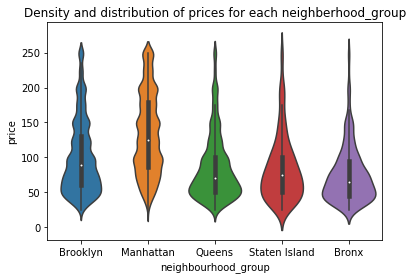

In [25]:
violin = sns.violinplot(data=data, x='neighbourhood_group', y='price')
violin.set_title('Density and distribution of prices for each neighberhood_group')

## Part 4 - Classification 

In [26]:
reg = linear_model.LinearRegression()
reg.fit(pre[['neighbourhood_group', 'neighbourhood', 'room_type', 'reviews_per_month', 'latitude', 'longitude']], data.price)

a = reg.coef_
i = reg.intercept_

print(a)
print(i)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Conclusion and Further Exploration



In [27]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,188


Through our data and analysis we can infer that:
1.
2.
3.
    
#How we or anyone can use this data#

Our data and analysis can be used to help people, such as travelers, find places to stay in New York City that meet their preferences in terms of neighborhood, availability, and price. It can also be used to predict the price of an Airbnb that meets their preference.

#How we can improve on our data or what we can research more on#

For future research we plan on predicting the popularity of an Airbnb room based on its attributes such as room type, neighborhood and availability. 

To improve on our data
